# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from requests.exceptions import ConnectionError
from scipy.stats import linregress
from pprint import pprint
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
import os

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
   
   
    

### Generate the Cities List by Using the `citipy` Library

In [4]:
#! pip install citipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 675.6/675.6 kB 1.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675969 sha256=d856d13f41563aa0c449da8a3fd082bcf6ceabcc2c08ff0d5c17392b8f6fb26f
  Stored in directory: /Users/marutibiswas/Library/Caches/pip/wheels/4b/b5/88/49107ff846ec6967b34c17d369176c591fc90ed93b706755ad
Successfully built citipy


In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 256


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port mathurin
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | dudinka
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | sarikamis
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | keflavik
Processing Record 10 of Set 1 | tobi village
City not found. Skipping...
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | ad dilam
Processing Record 14 of Set 1 | vila velha
Processing Record 15 of Set 1 | ust'-ilimsk
Processing Record 16 of Set 1 | iskateley
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | 

Processing Record 39 of Set 4 | el jadid
Processing Record 40 of Set 4 | singaraja
Processing Record 41 of Set 4 | khandyga
Processing Record 42 of Set 4 | shahba
Processing Record 43 of Set 4 | port hedland
Processing Record 44 of Set 4 | minas de marcona
Processing Record 45 of Set 4 | touros
Processing Record 46 of Set 4 | sitka
Processing Record 47 of Set 4 | rio grande
Processing Record 48 of Set 4 | zilupe
Processing Record 49 of Set 4 | takoradi
Processing Record 0 of Set 5 | crane
Processing Record 1 of Set 5 | saynshand
Processing Record 2 of Set 5 | tarauaca
Processing Record 3 of Set 5 | asau
Processing Record 4 of Set 5 | vilyuysk
Processing Record 5 of Set 5 | vanimo
Processing Record 6 of Set 5 | bad lobenstein
Processing Record 7 of Set 5 | enewetak
Processing Record 8 of Set 5 | quellon
Processing Record 9 of Set 5 | khanty-mansiysk
Processing Record 10 of Set 5 | paradera
City not found. Skipping...
Processing Record 11 of Set 5 | rosiorii de vede
Processing Record 12 

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          246
Lat           246
Lng           246
Max Temp      246
Humidity      246
Cloudiness    246
Wind Speed    246
Country       246
Date          246
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,26.21,76,20,4.66,MU,1702171797
1,blackmans bay,-43.0167,147.3167,19.74,43,0,2.75,AU,1702171782
2,puerto ayora,-0.7393,-90.3518,24.19,96,41,2.24,EC,1702171784
3,dudinka,69.4058,86.1778,-31.85,96,99,1.34,RU,1702171858
4,waitangi,-43.9535,-176.5597,14.90,90,100,3.13,NZ,1702171619


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,26.21,76,20,4.66,MU,1702171797
1,blackmans bay,-43.0167,147.3167,19.74,43,0,2.75,AU,1702171782
2,puerto ayora,-0.7393,-90.3518,24.19,96,41,2.24,EC,1702171784
3,dudinka,69.4058,86.1778,-31.85,96,99,1.34,RU,1702171858
4,waitangi,-43.9535,-176.5597,14.90,90,100,3.13,NZ,1702171619


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

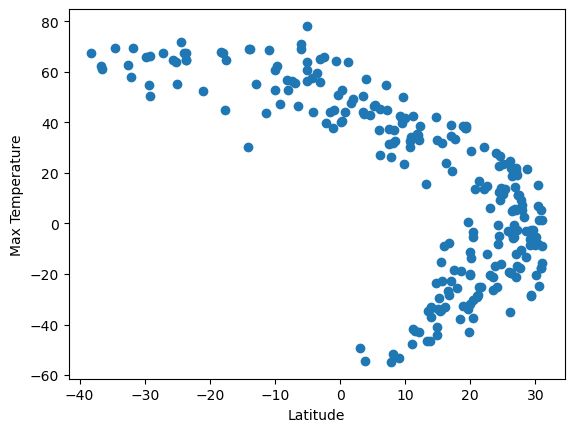

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

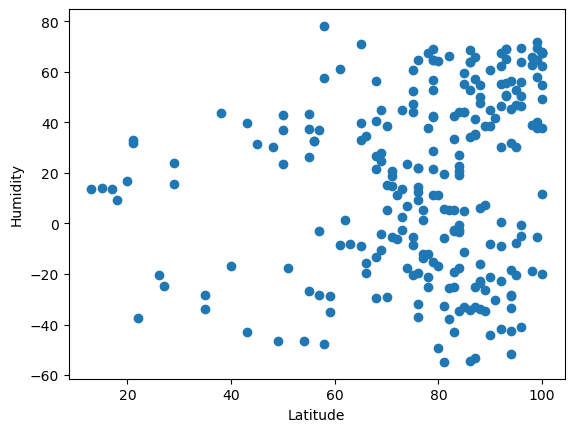

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

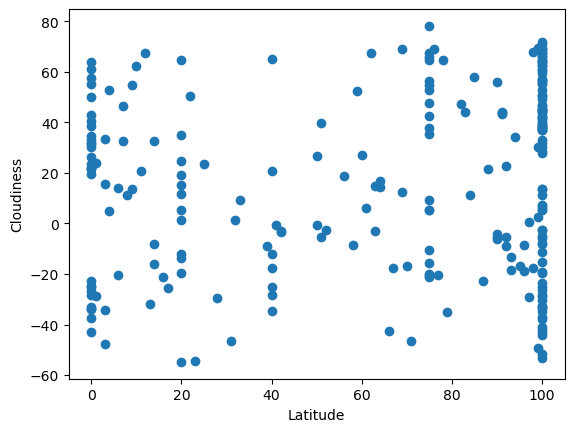

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

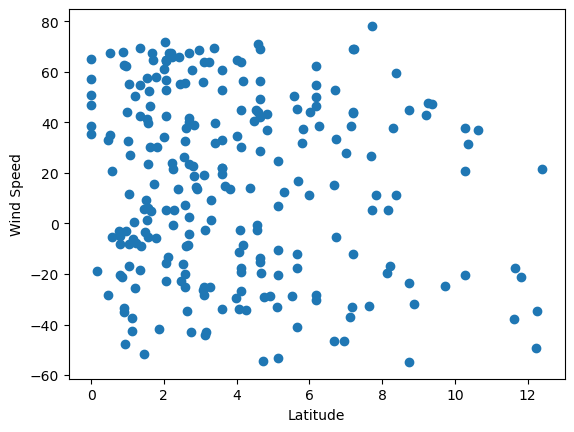

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")


# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
from scipy import stats as st
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,dudinka,69.4058,86.1778,-31.85,96,99,1.34,RU,1702171858
5,sarikamis,40.3381,42.5731,0.19,99,100,2.70,TR,1702171896
6,bethel,41.3712,-73.4140,9.55,87,100,1.54,US,1702171783
7,ilulissat,69.2167,-51.1000,-5.99,79,100,4.63,GL,1702171775
8,keflavik,64.0049,-22.5624,1.24,86,0,3.09,IS,1702171543


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,26.21,76,20,4.66,MU,1702171797
1,blackmans bay,-43.0167,147.3167,19.74,43,0,2.75,AU,1702171782
2,puerto ayora,-0.7393,-90.3518,24.19,96,41,2.24,EC,1702171784
4,waitangi,-43.9535,-176.5597,14.90,90,100,3.13,NZ,1702171619
10,puerto natales,-51.7236,-72.4875,8.05,94,100,1.45,CL,1702171785


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.867347591660316


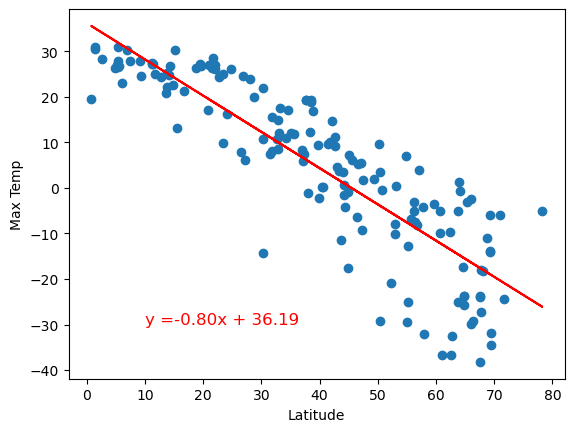

In [28]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

The r-value is: 0.7490946540285407


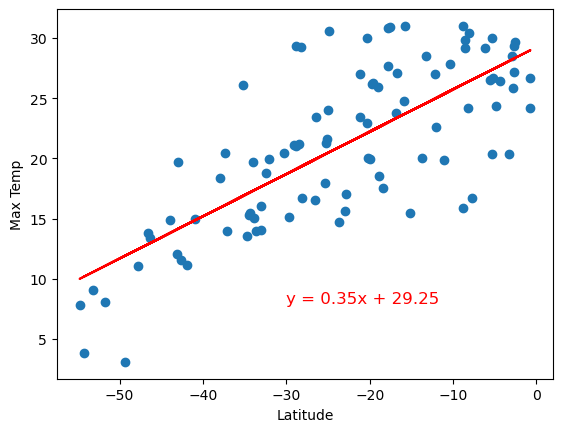

In [29]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))

**Discussion about the linear relationship:** Latitude and Max Temp have linear relationship on Southern Hemisphere

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3851924002621817


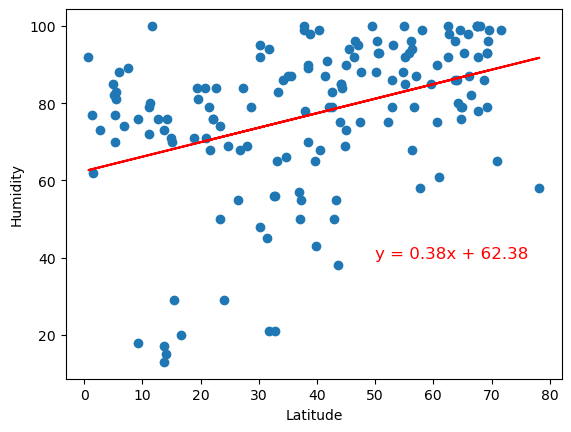

In [30]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))

The r-value is: 0.063299648571188


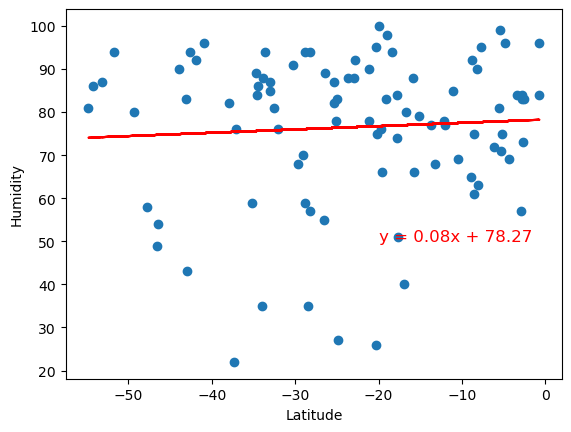

In [31]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 50))

**Discussion about the linear relationship:**  Latitude and Humidity have linear relationship on Southern Hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2586742248157707


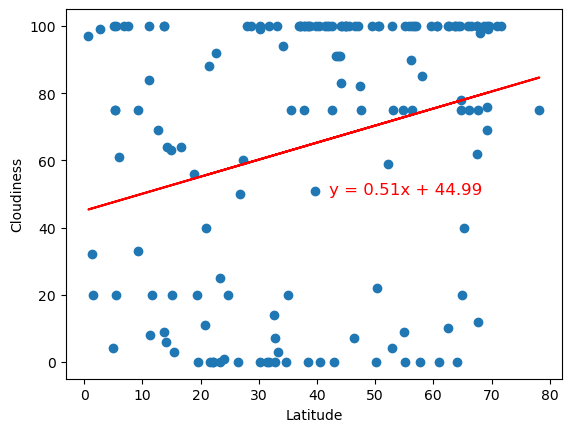

In [32]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 50))

The r-value is: 0.11690723985644288


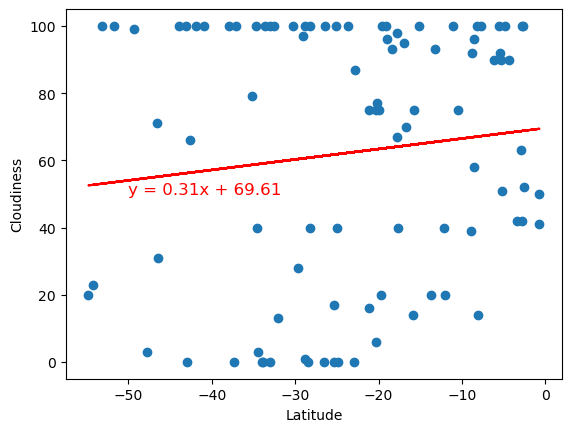

In [33]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 50))

**Discussion about the linear relationship:** Latitude and Cloudiness have linear relationship on Southern 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.0894268998547125


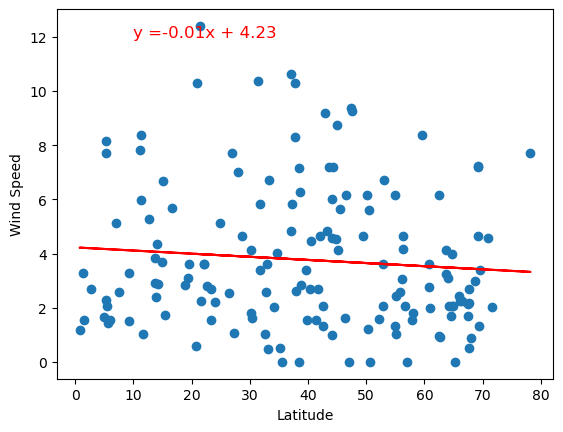

In [34]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))

The r-value is: -0.2706987237173261


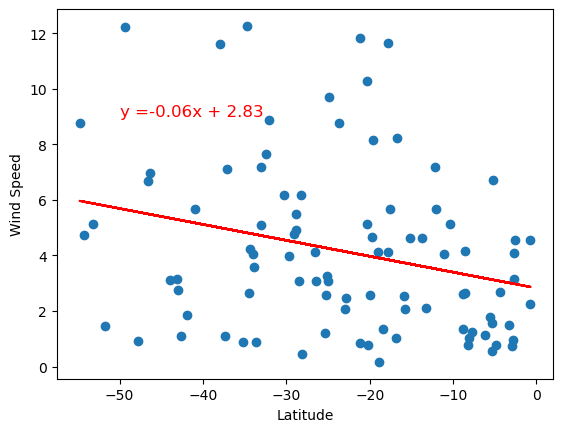

In [40]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))

**Discussion about the linear relationship:** Latitude and Wind Speed have linear relationship on Southern 